In [4]:
# importing libraries

In [65]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
# loading dataset

In [202]:
df_train = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv")

In [203]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [10]:
df_test = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv")

In [11]:
df_test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [12]:
df_train.shape

(31647, 18)

In [13]:
df_test.shape

(13564, 17)

In [14]:
# DATA EXPLORATION

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [17]:
df_train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [18]:
df_test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [19]:
# There are no null values in our dataset

In [20]:
df_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [21]:
df_test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [22]:
# There is some imbalance in our dataset

In [23]:
df_train.duplicated().sum()

0

In [24]:
df_test.duplicated().sum()

0

In [25]:
# There are no duplicate values in our dataset

In [26]:
# Column Names

In [27]:
df_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [28]:
df_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [29]:
# Count of 'Yes' and 'No' in our dataset

In [30]:
df_train.groupby('default').size()

default
no     31062
yes      585
dtype: int64

In [31]:
df_test.groupby('default').size()

default
no     13334
yes      230
dtype: int64

In [32]:
df_train.groupby('housing').size()

housing
no     14063
yes    17584
dtype: int64

In [33]:
df_test.groupby('housing').size()

housing
no     6018
yes    7546
dtype: int64

In [34]:
df_train.groupby('loan').size()

loan
no     26516
yes     5131
dtype: int64

In [35]:
df_test.groupby('loan').size()

loan
no     11451
yes     2113
dtype: int64

In [36]:
for a in list (df_train.columns):
    b = df_train[a].unique()
    print(a)
    print(b)

ID
[26110 40576 15320 ... 19710 38556 14156]
age
[56 31 27 57 33 50 45 35 36 44 39 43 41 53 64 48 60 29 30 42 46 32 63 47
 49 52 68 26 58 38 54 40 59 24 37 34 61 55 20 69 25 62 22 51 28 70 66 23
 87 71 74 81 73 76 72 84 19 79 75 21 83 80 67 18 77 65 82 86 78 88 92 95
 93 89 94 90]
job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
balance
[1933    3  891 ... 2787 8741 2968]
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
day
[19 20 18 22  4  2  3  8 15  5 28  6 14  7 24 13  9 11 21 12 30 27 17 16
 25 10  1 29 26 31 23]
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
duration
[  44   91  240 ...  939  839 1973]
campaign
[ 2  1  3  4  7  5 33 12  8  9  6 24 17 11 20 25 19 29 21 10 27 38 16 18
 14 30 13 15 63

In [37]:
for a in list (df_test.columns):
    b = df_test[a].unique()
    print(a)
    print(b)

ID
[38441 40403  3709 ... 28292 45163 34839]
age
[32 78 31 57 45 33 37 36 50 34 40 35 53 59 27 46 58 54 51 26 56 38 48 39
 41 29 43 25 42 47 30 44 28 49 20 60 24 52 55 61 62 64 65 63 66 68 77 69
 87 79 21 73 19 82 22 74 83 85 70 23 95 93 67 18 75 71 80 72 81 86 84 92
 76 89 90]
job
['services' 'retired' 'self-employed' 'blue-collar' 'management'
 'technician' 'admin.' 'unemployed' 'housemaid' 'entrepreneur' 'student'
 'unknown']
marital
['married' 'divorced' 'single']
education
['secondary' 'primary' 'tertiary' 'unknown']
default
['no' 'yes']
balance
[ 118 2787  144 ... 1805 3495 4256]
housing
['yes' 'no']
loan
['no' 'yes']
contact
['cellular' 'telephone' 'unknown']
day
[15  1 16 13  3 22  5  2 25 21  7  9  6  4 14 27  8 30 28 31 29 10 23 26
 12 17 20 11 19 18 24]
month
['may' 'jul' 'jun' 'mar' 'feb' 'sep' 'aug' 'dec' 'jan' 'apr' 'nov' 'oct']
duration
[  20  372  676 ... 1085 1745  881]
campaign
[ 6  1  2  4  5  9  3  7 10  8 12 32 18 11 15 29 16 13 19 21 14 17 23 26
 25 24 50 20 33 27

In [38]:
# Delete the  rows for columns 'poutcome' which contains 'other'

In [204]:
condition = df_train['poutcome'] == 'other'
df_train = df_train.drop(df_train[condition].index, axis = 0,inplace = False)

In [205]:
df_train[['job','education']] = df_train[['job','education']].replace(['unknown'],'other')

In [206]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,other,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,other,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [42]:
df_train.shape

(30359, 18)

In [43]:
# As you can see that there are 30359 rows and 18 columns in our dataset after cleaning

In [44]:
# And the other columns like 'job' and 'education' has been replaced with 'other'

In [207]:
from scipy.stats import zscore

In [208]:
df_train['balance'] = zscore(df_train['balance'])
condition = (df_train['balance'] > 3 )| (df_train['balance'] < -3)
df_train = df_train.drop(df_train[condition].index, axis = 0,inplace = False)

In [209]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,other,no,0.191181,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,other,married,secondary,no,-0.450733,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,-0.155386,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,0.641519,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,-0.412152,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [210]:
df_train.shape

(29849, 18)

In [49]:
# Outliers have been removed from column 'balance'

In [50]:
# Dropping the column the 'contact' which is useless in our dataset

In [211]:
df_train = df_train.drop(['contact'], axis = 1)

In [212]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,other,no,0.191181,no,no,19,nov,44,2,-1,0,unknown,no
1,40576,31,other,married,secondary,no,-0.450733,no,no,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,-0.155386,yes,no,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,0.641519,no,no,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,-0.412152,yes,no,4,feb,380,1,-1,0,unknown,no


In [213]:
# Changing the duration column from seconds to minutes

In [214]:
df_train['duration'] = df_train['duration'].apply(lambda n:n/60).round(2)

In [215]:
df_train['duration'].head()

0     0.73
1     1.52
2     4.00
3    14.45
4     6.33
Name: duration, dtype: float64

In [216]:
# Drop rows with duration < 5 seconds

In [217]:
condition = (df_train['duration'] < 5/60)
df_train = df_train.drop(df_train[condition].index, axis = 0,inplace = False)

In [218]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,other,no,0.191181,no,no,19,nov,0.73,2,-1,0,unknown,no
1,40576,31,other,married,secondary,no,-0.450733,no,no,20,jul,1.52,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,-0.155386,yes,no,18,jul,4.00,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,0.641519,no,no,22,jun,14.45,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,-0.412152,yes,no,4,feb,6.33,1,-1,0,unknown,no


In [219]:
df_train.shape

(29813, 17)

In [220]:
# By using Label Encoding we can convert categorical columns into numerical columns like month in this case 

In [221]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [222]:
df_train['month'] = encoder.fit_transform(df_train['month'])

In [223]:
df_train['month'].unique()

array([ 9,  5,  6,  3, 11,  4,  8,  1,  0, 10,  7,  2])

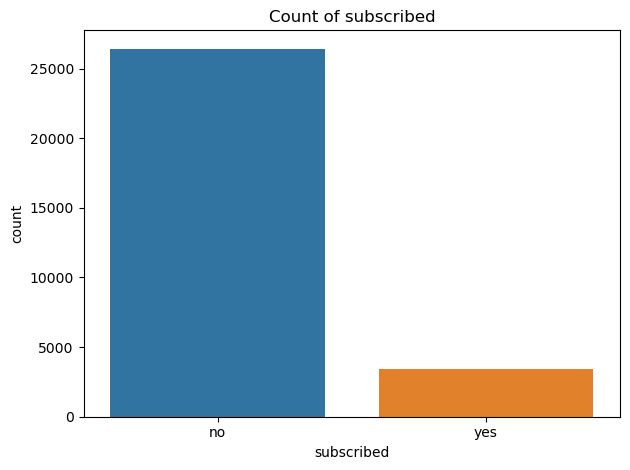

In [106]:
sns.countplot(x = 'subscribed', data = df_train)
plt.title('Count of subscribed')
plt.tight_layout()
plt.show()

In [66]:
# Segregating Categorical and Numerical Columns

In [68]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'subscribed','poutcome']
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays','day', 'previous']

In [69]:
# Univariate Analysis of Categorical Features

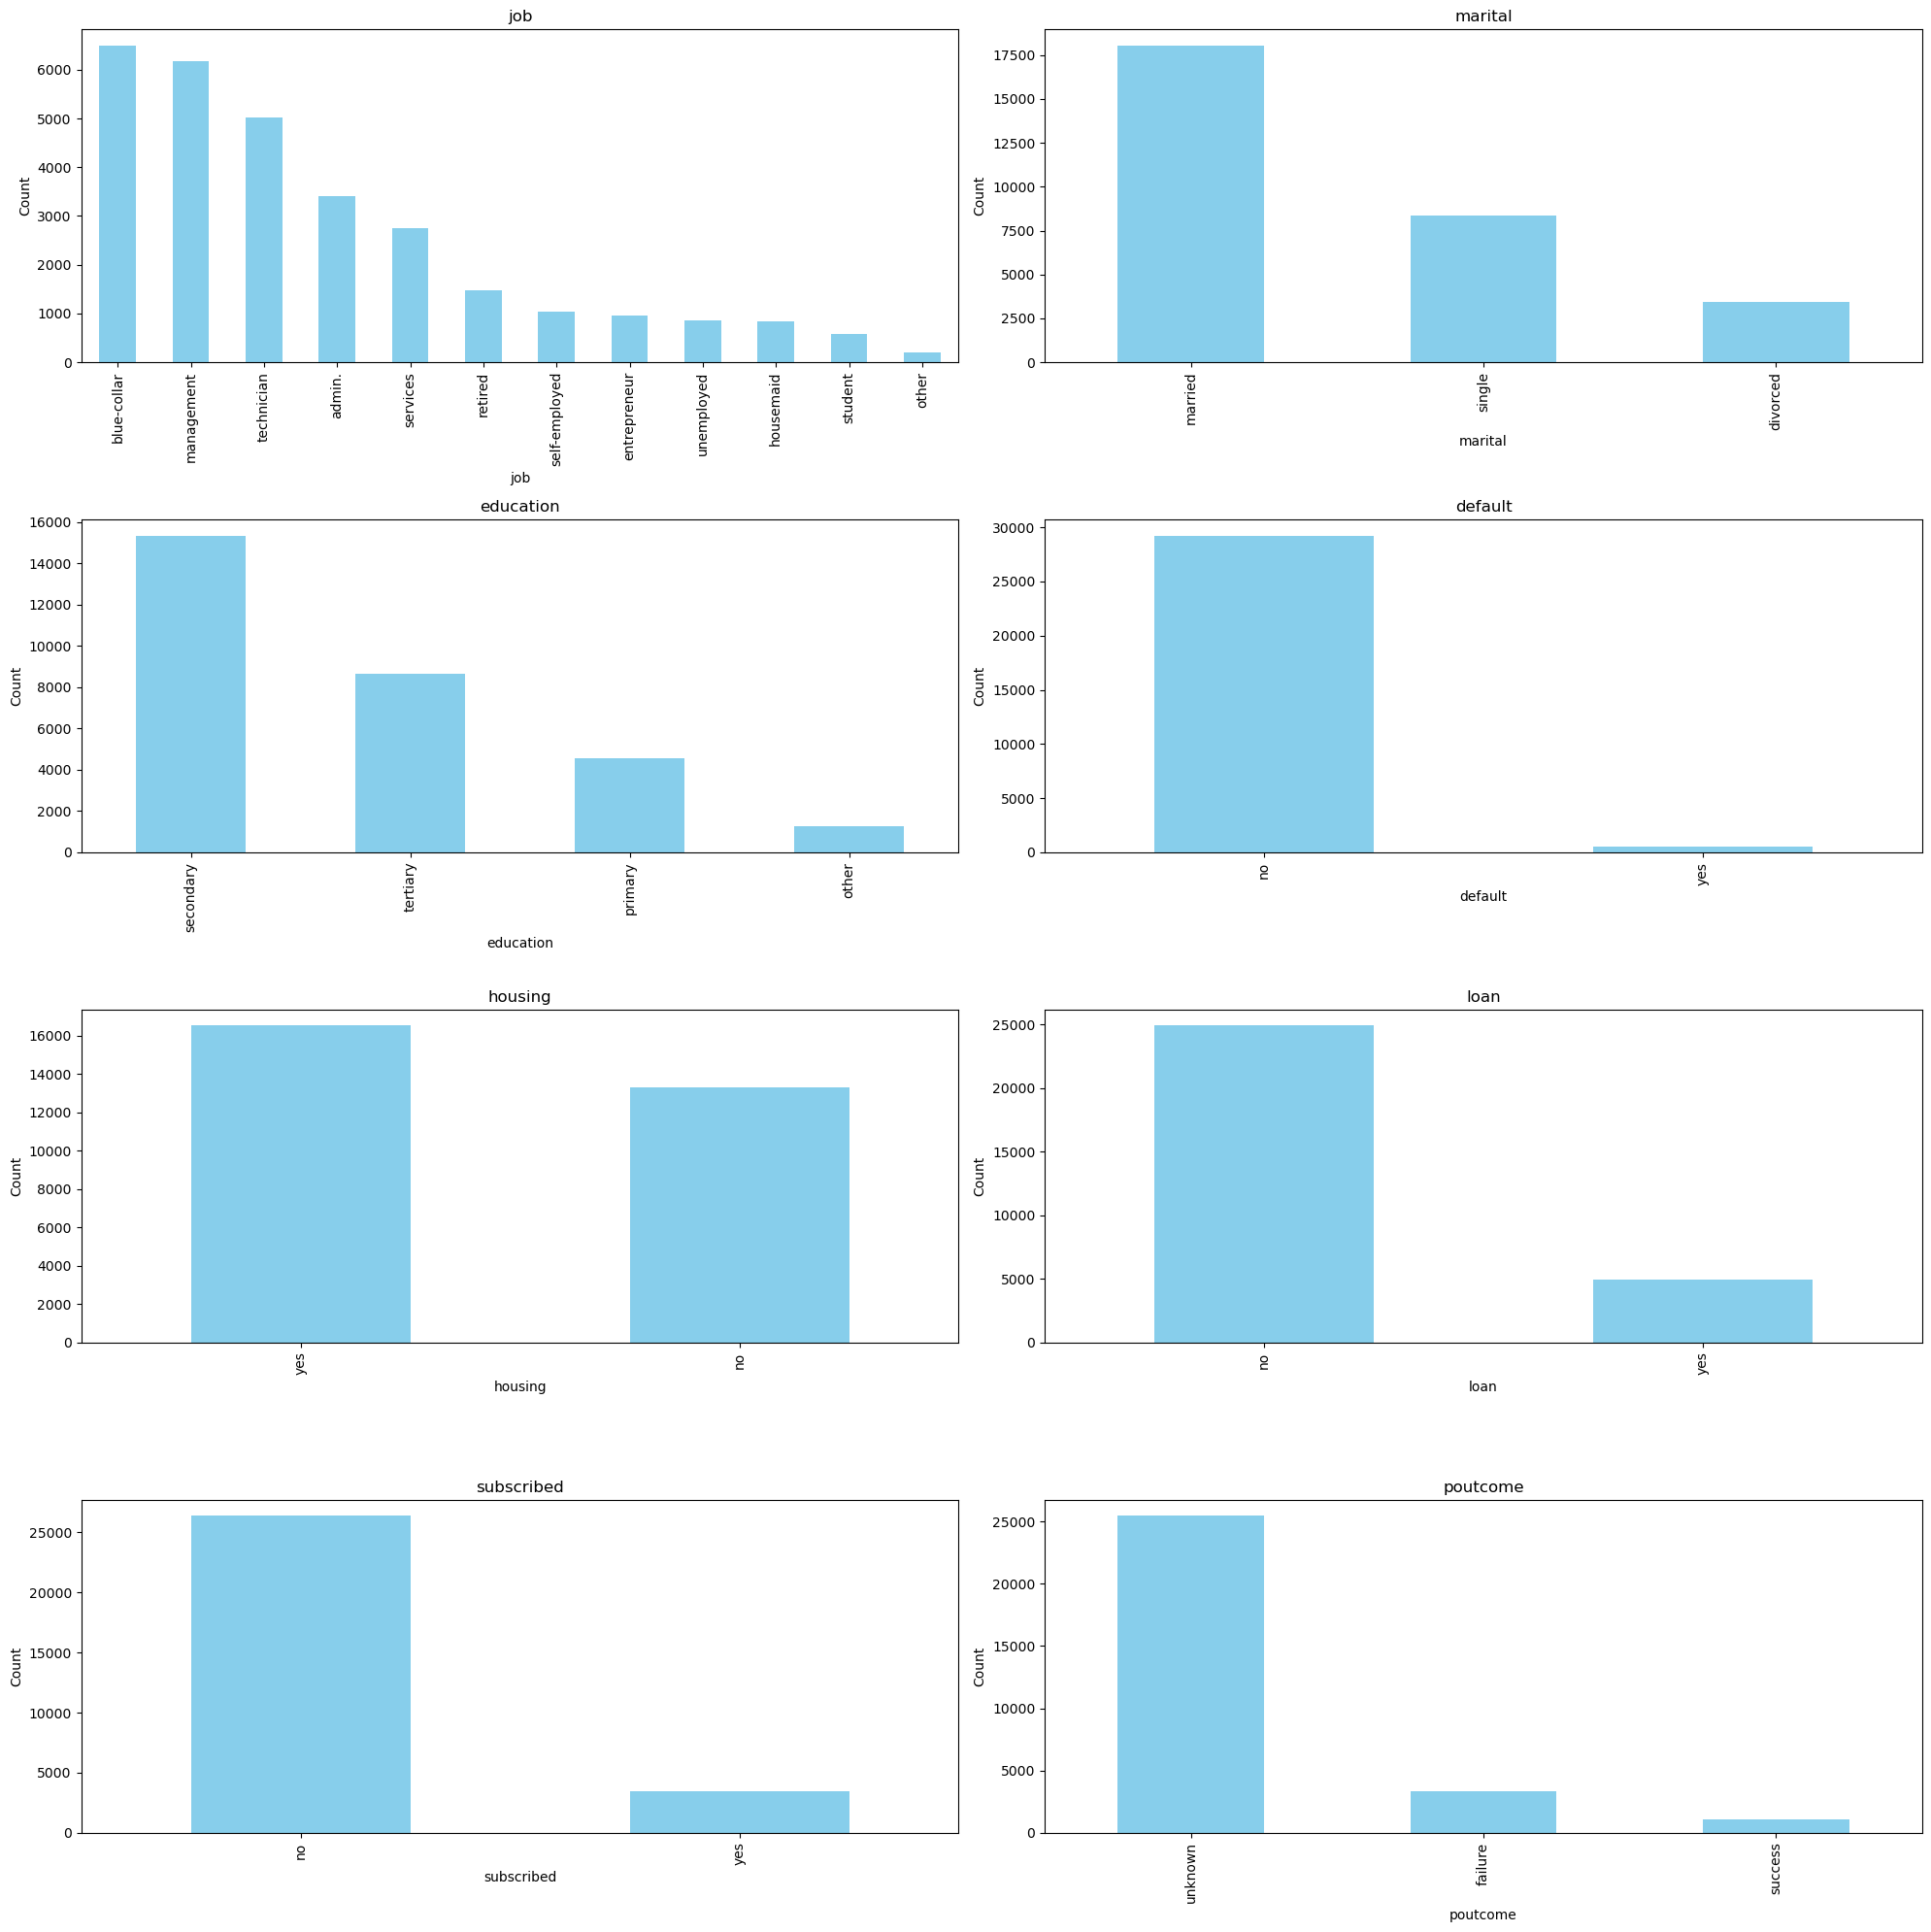

In [76]:
fig, ax = plt.subplots(4, 2, figsize = (20, 20))
ax = ax.flatten()
for i,column in enumerate(categorical_columns):
    row = i//2
    col = i%2
    df_train[column].value_counts().plot(kind = 'bar', ax = ax[i], color = 'skyblue')
    ax[i].set_title(f'{column}')
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Count')
for j in range (len(categorical_columns) , len(ax.ravel())):
    ax.ravel()[j].axis('off')

plt.tight_layout()
plt.show()

In [78]:
# Bivariate Analysis of Categorical Features with Target Column 'subscribed'

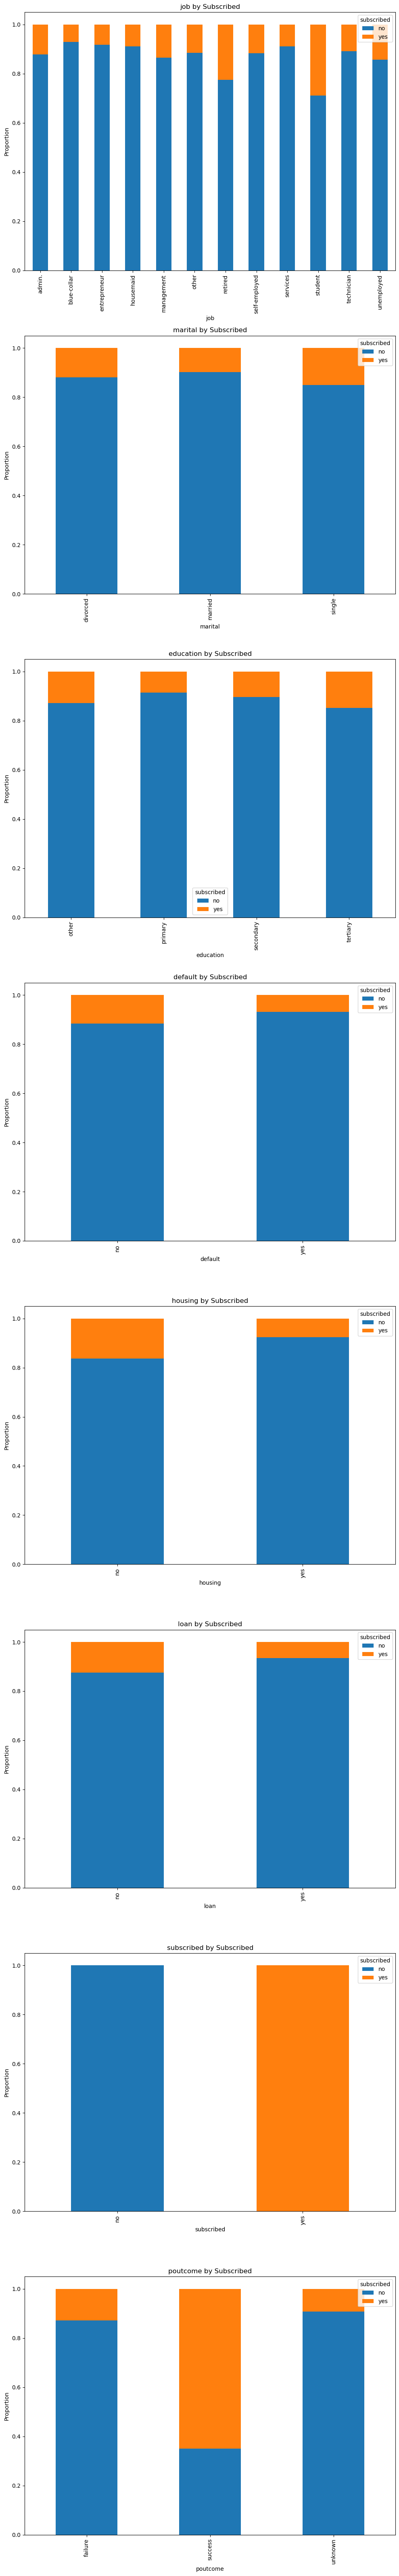

In [80]:
# Create subplots for each categorical column
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 8 * len(categorical_columns)))

# Iterate over each categorical column and create crosstab plots
for i, column in enumerate(categorical_columns):
    crosstab = pd.crosstab(df_train[column], df_train['subscribed'], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f'{column} by Subscribed')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

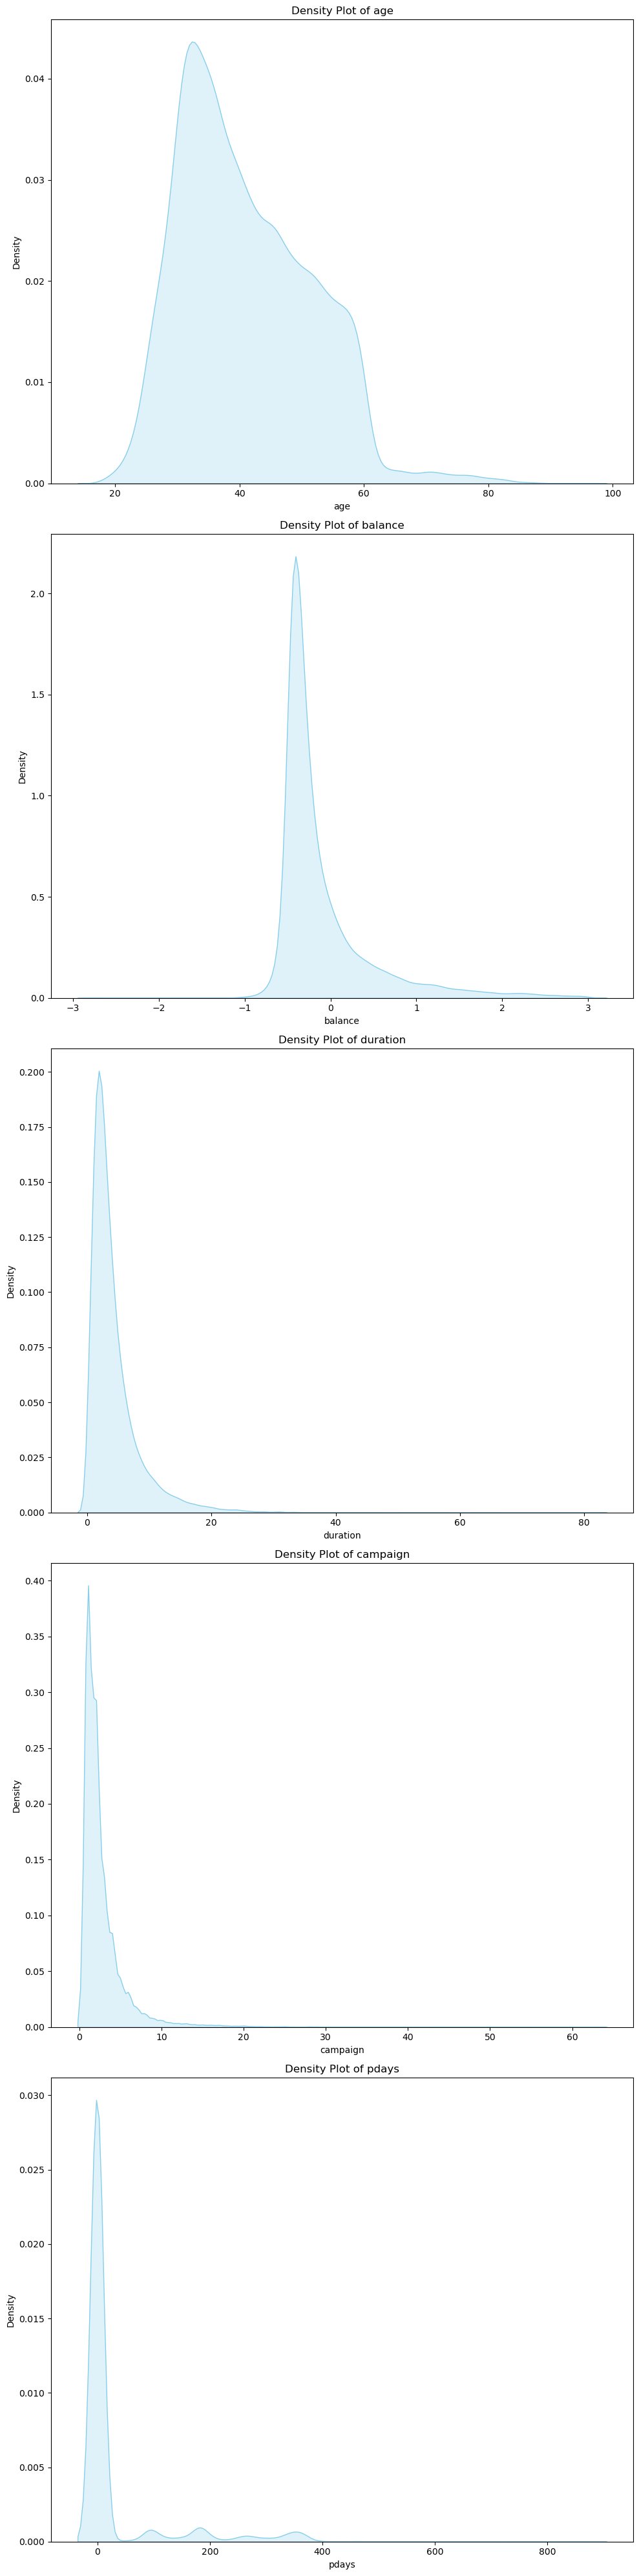

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for univariate analysis
numerical_columns = ['age', 'balance', 'duration', 'campaign', 'pdays']

# Create subplots for each numerical column
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 8 * len(numerical_columns)))

# Iterate over each numerical column and create density plots
for i, column in enumerate(numerical_columns):
    sns.kdeplot(data=df_train[column], ax=axes[i], color='skyblue', fill=True)
    axes[i].set_title(f'Density Plot of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

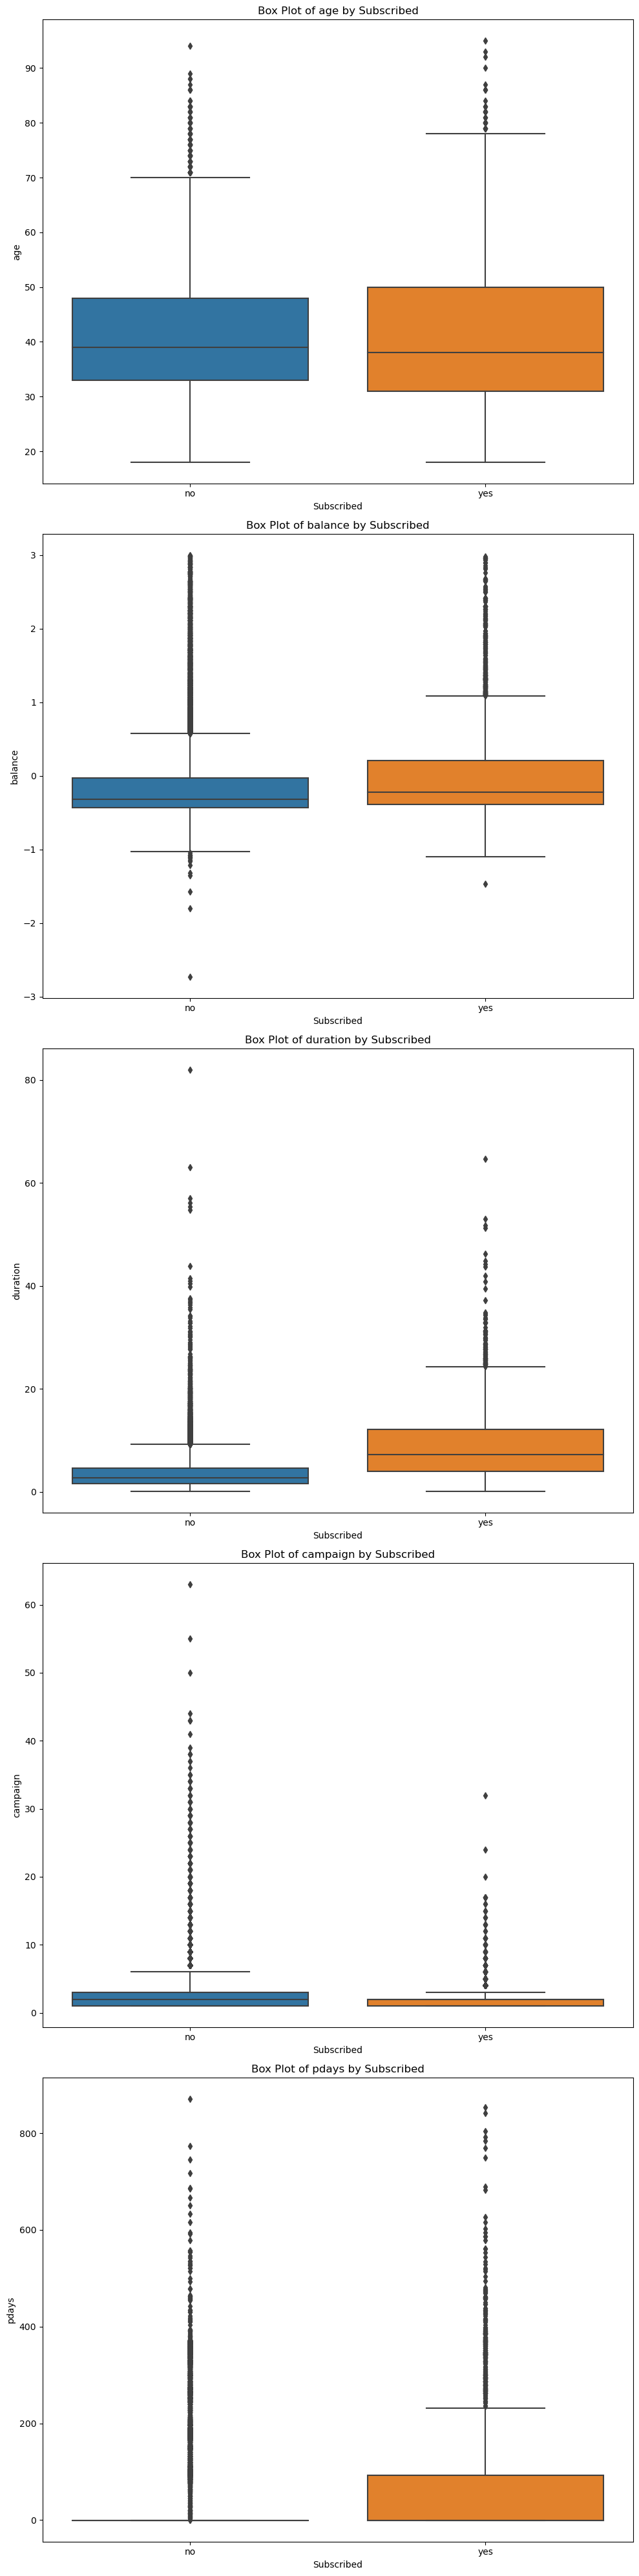

In [82]:
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 8 * len(numerical_columns)))

# Iterate over each numerical column and create box plots
for i, column in enumerate(numerical_columns):
    sns.boxplot(x='subscribed', y=column, data=df_train, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column} by Subscribed')
    axes[i].set_xlabel('Subscribed')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()


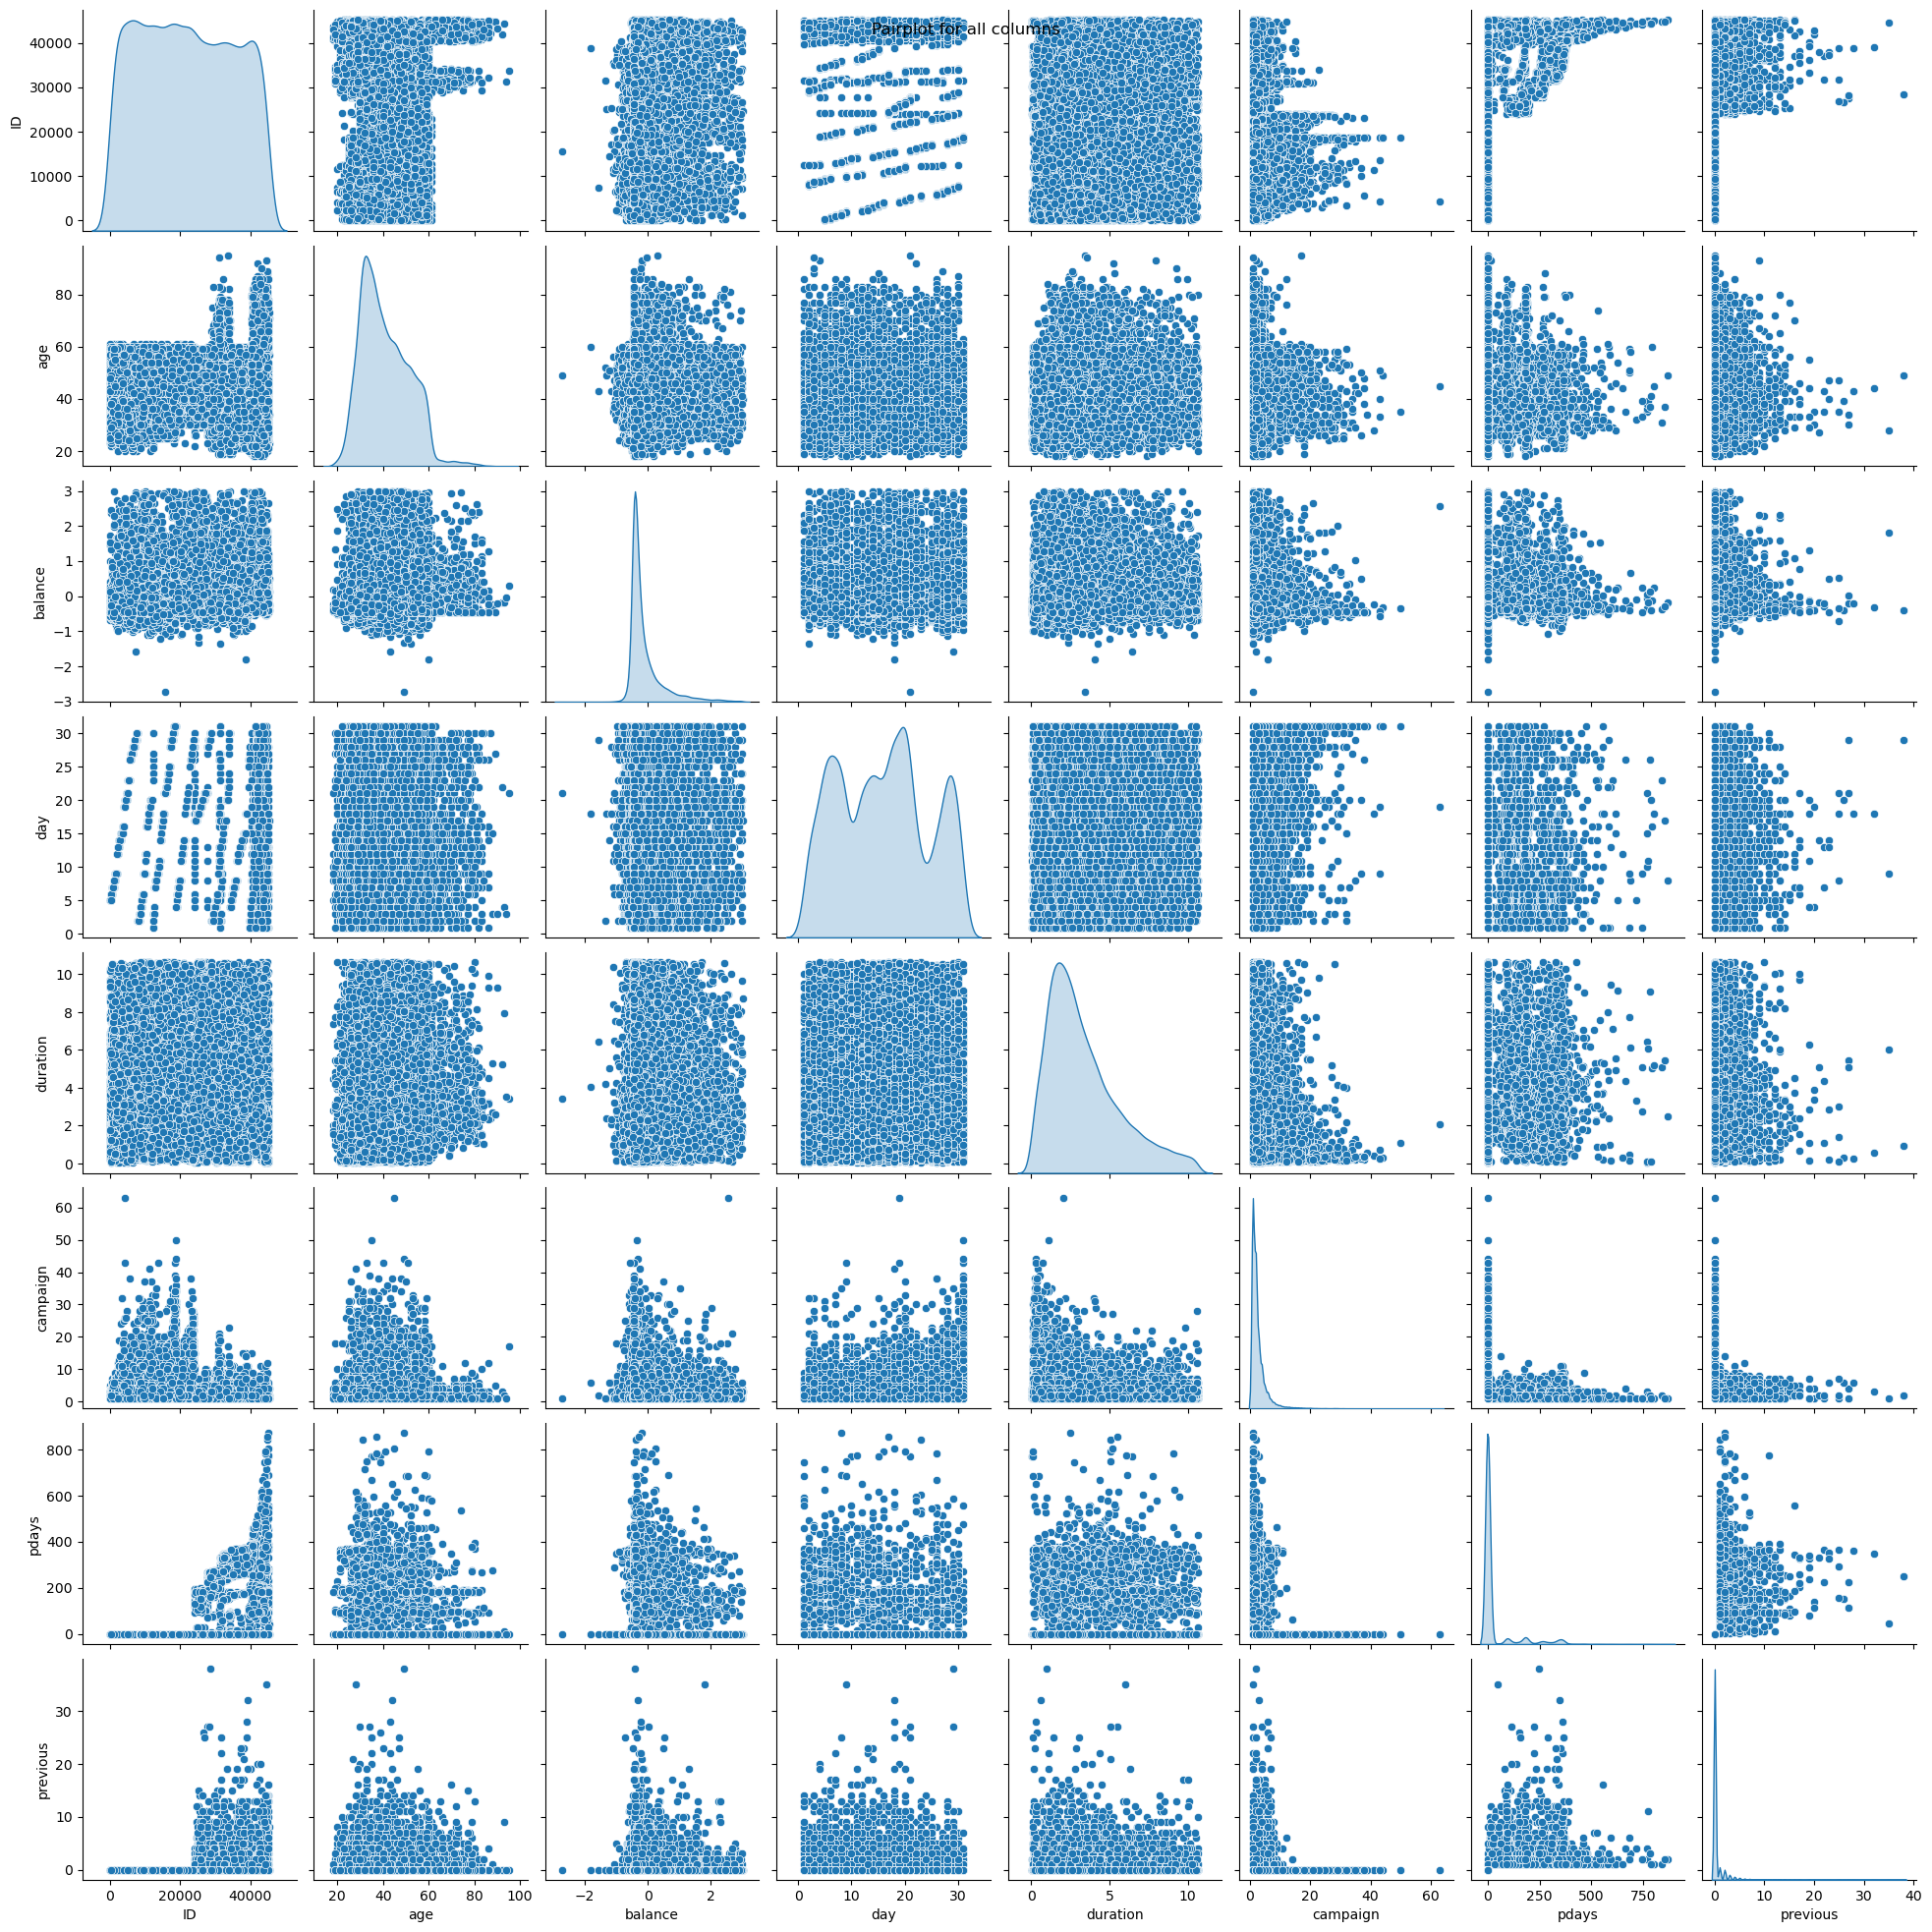

In [127]:
sns.pairplot(df_train[df_train.columns], diag_kind = 'kde')
plt.suptitle('Pairplot for all columns')
plt.show()

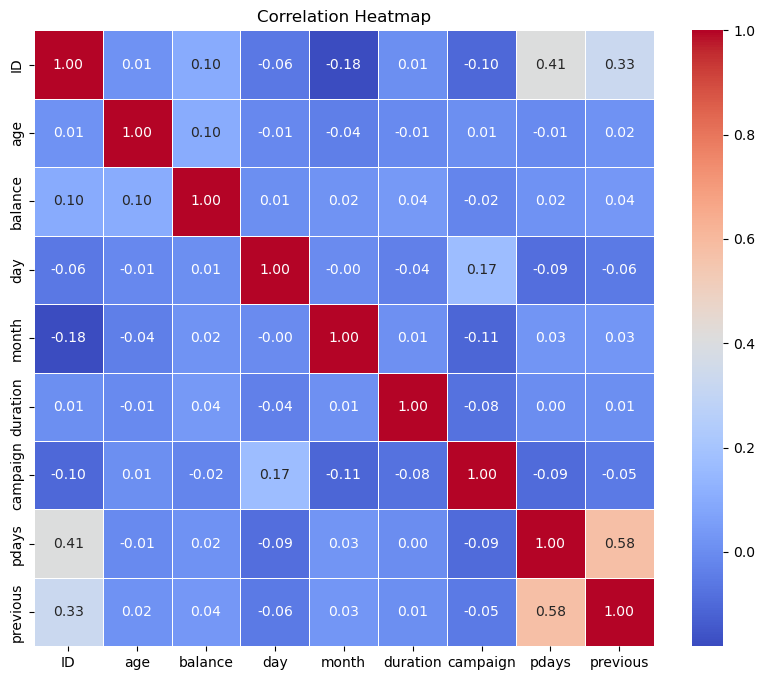

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_train.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [85]:
# we can drop duration column because it is highly correlated with target column

In [86]:
# We can't predict how long talk to the client (duration) and how many calls it would require to get the client (campaign) answer
# So we can drop these two columns i.e. duration and campaign.

In [224]:
df_train = df_train.drop(['duration', 'campaign'], axis = 1)

In [225]:
df_train.head()

,ID,age,job,marital,education,default,balance,housing,loan,day,month,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,other,no,0.191181,no,no,19,9,-1,0,unknown,no
1,40576,31,other,married,secondary,no,-0.450733,no,no,20,5,-1,0,unknown,no
2,15320,27,services,married,secondary,no,-0.155386,yes,no,18,5,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,0.641519,no,no,22,6,84,3,success,yes
4,29842,31,technician,married,secondary,no,-0.412152,yes,no,4,3,-1,0,unknown,no


In [89]:
#Dropping ID column also as it is not useful

In [226]:
df_train = df_train.drop(['ID'], axis = 1)

In [227]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,pdays,previous,poutcome,subscribed
0,56,admin.,married,other,no,0.191181,no,no,19,9,-1,0,unknown,no
1,31,other,married,secondary,no,-0.450733,no,no,20,5,-1,0,unknown,no
2,27,services,married,secondary,no,-0.155386,yes,no,18,5,-1,0,unknown,no
3,57,management,divorced,tertiary,no,0.641519,no,no,22,6,84,3,success,yes
4,31,technician,married,secondary,no,-0.412152,yes,no,4,3,-1,0,unknown,no


In [228]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['subscribed'] = label_encoder.fit_transform(df_train['subscribed']) 

In [229]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,pdays,previous,poutcome,subscribed
0,56,admin.,married,other,no,0.191181,no,no,19,9,-1,0,unknown,0
1,31,other,married,secondary,no,-0.450733,no,no,20,5,-1,0,unknown,0
2,27,services,married,secondary,no,-0.155386,yes,no,18,5,-1,0,unknown,0
3,57,management,divorced,tertiary,no,0.641519,no,no,22,6,84,3,success,1
4,31,technician,married,secondary,no,-0.412152,yes,no,4,3,-1,0,unknown,0


In [230]:
df_train['job'] = label_encoder.fit_transform(df_train['job'])

In [231]:
df_train['marital'] = label_encoder.fit_transform(df_train['marital'])

In [232]:
df_train['education'] = label_encoder.fit_transform(df_train['education'])

In [233]:
df_train['default'] = label_encoder.fit_transform(df_train['default'])

In [234]:
df_train['housing'] = label_encoder.fit_transform(df_train['housing'])

In [235]:
df_train['loan'] = label_encoder.fit_transform(df_train['loan'])

In [236]:
df_train['poutcome'] = label_encoder.fit_transform(df_train['poutcome'])

In [237]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,pdays,previous,poutcome,subscribed
0,56,0,1,0,0,0.191181,0,0,19,9,-1,0,2,0
1,31,5,1,2,0,-0.450733,0,0,20,5,-1,0,2,0
2,27,8,1,2,0,-0.155386,1,0,18,5,-1,0,2,0
3,57,4,0,3,0,0.641519,0,0,22,6,84,3,1,1
4,31,10,1,2,0,-0.412152,1,0,4,3,-1,0,2,0


In [238]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [239]:
df_train_1 = scaler.fit_transform(df_train)

In [240]:
df_train_1

array([[0.49350649, 0.        , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.16883117, 0.45454545, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.11688312, 0.72727273, 0.5       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.18181818, 0.36363636, 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.50649351, 0.90909091, 0.5       , ..., 0.31578947, 0.        ,
        0.        ],
       [0.48051948, 0.36363636, 0.        , ..., 0.        , 1.        ,
        1.        ]])

In [241]:
df_train = pd.DataFrame(df_train_1, columns = df_train.columns)

In [242]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,day,month,pdays,previous,poutcome,subscribed
0,0.493506,0.000000,0.5,0.000000,0.0,0.509724,0.0,0.0,0.600000,0.818182,0.000000,0.000000,1.0,0.0
1,0.168831,0.454545,0.5,0.666667,0.0,0.397678,0.0,0.0,0.633333,0.454545,0.000000,0.000000,1.0,0.0
2,0.116883,0.727273,0.5,0.666667,0.0,0.449231,1.0,0.0,0.566667,0.454545,0.000000,0.000000,1.0,0.0
3,0.506494,0.363636,0.0,1.000000,0.0,0.588331,0.0,0.0,0.700000,0.545455,0.097477,0.078947,0.5,1.0
4,0.168831,0.909091,0.5,0.666667,0.0,0.404412,1.0,0.0,0.100000,0.272727,0.000000,0.000000,1.0,0.0


In [243]:
df_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [244]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_train, df_train['subscribed'], test_size = 0.2, random_state = 0)

In [245]:
x_train.shape

(23850, 14)

In [246]:
x_test.shape

(5963, 14)

In [247]:
y_train.shape

(23850,)

In [248]:
y_test.shape

(5963,)

In [249]:
from sklearn.linear_model import LogisticRegression

In [250]:
from sklearn.tree import DecisionTreeClassifier

In [251]:
from sklearn.ensemble import RandomForestClassifier

In [252]:
from sklearn.svm import SVC

In [253]:
from sklearn.metrics import accuracy_score

In [254]:
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
y_pred = logistic.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [255]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [256]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [257]:
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

In [260]:
from sklearn.model_selection import cross_val_score

In [259]:
from sklearn.model_selection import GridSearchCV

In [263]:
param_grid = {'max_depth':[10,20,30],
              'min_samples_split':[2,5,10],
             'min_samples_leaf':[1,2,4]}

In [264]:
model = DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid, cv = 5)
grid.fit(x_train, y_train)
best_model = grid.best_estimator_

In [265]:
y_pred = best_model.predict(x_test)
accuracy_score(y_test, y_pred)

1.0